# Analytical Derivation of Ground State Energy for Adiabatic Hamiltonian of 4 Particles

In [2]:
import sympy as sp
from matplotlib import pyplot as plt

## Old Hamiltonian

![alt text](images/adiabatic_hamiltonian2.png "Adiabatic Hamiltonian")

In [3]:
#old analytical try again

In [4]:
d = sp.Symbol('delta')
E = sp.Symbol('E') # energy eigen value
H = sp.Matrix([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, -1, 0, -1, -1],
    [0, 0, 0, -1, -1, -1],
    [0, 0, -1, -1, -1, 0],
    [0, 0, -1, -1, 0, -1]
              ])
H
H.eigenvects()

[(-3, 1, [Matrix([
   [0],
   [0],
   [1],
   [1],
   [1],
   [1]])]), (-1, 2, [Matrix([
   [ 0],
   [ 0],
   [-1],
   [ 1],
   [ 0],
   [ 0]]), Matrix([
   [ 0],
   [ 0],
   [ 0],
   [ 0],
   [-1],
   [ 1]])]), (1, 3, [Matrix([
   [1],
   [0],
   [0],
   [0],
   [0],
   [0]]), Matrix([
   [0],
   [1],
   [0],
   [0],
   [0],
   [0]]), Matrix([
   [ 0],
   [ 0],
   [-1],
   [-1],
   [ 1],
   [ 1]])])]

In [5]:
d = sp.Symbol('delta')
E = sp.Symbol('E') # energy eigen value
H = sp.Rational(-1,2)*sp.Matrix([
    [2*d, 0, 0, 0, 1+d, 1+d],
    [0, 2*d, 0 ,0, 1+d, 1+d],
    [0, 0, 2*d, 0, 1-d, 1-d],
    [0, 0, 0, 2*d, 1-d, 1-d],
    [1+d, 1+d, 1-d, 1-d, 2, 0],
    [1+d, 1+d, 1-d, 1-d, 0, 2]
              ])
I = sp.eye(6)
H.subs(d, 1)

Matrix([
[-1,  0,  0,  0, -1, -1],
[ 0, -1,  0,  0, -1, -1],
[ 0,  0, -1,  0,  0,  0],
[ 0,  0,  0, -1,  0,  0],
[-1, -1,  0,  0, -1,  0],
[-1, -1,  0,  0,  0, -1]])

In [6]:
for x in H.subs(d, 0).eigenvects():
    print(x)

(-2, 1, [Matrix([
[1/2],
[1/2],
[1/2],
[1/2],
[  1],
[  1]])])
(-1, 1, [Matrix([
[ 0],
[ 0],
[ 0],
[ 0],
[-1],
[ 1]])])
(0, 3, [Matrix([
[-1],
[ 1],
[ 0],
[ 0],
[ 0],
[ 0]]), Matrix([
[-1],
[ 0],
[ 1],
[ 0],
[ 0],
[ 0]]), Matrix([
[-1],
[ 0],
[ 0],
[ 1],
[ 0],
[ 0]])])
(1, 1, [Matrix([
[-1],
[-1],
[-1],
[-1],
[ 1],
[ 1]])])


In [7]:
deltas = [x/100 for x in range(101)]

In [8]:
energies = []
for delta in deltas:
    e_vals = H.subs(d, delta).eigenvals()
    e_val_max = 1000
    for e_val in e_vals:
        if e_val < e_val_max:
            e_val_max = e_val
    energies.append(e_val_max)

## Graph 

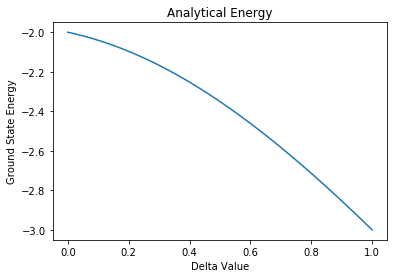

In [9]:
plt.plot(deltas, energies)
plt.xlabel("Delta Value")
plt.ylabel("Ground State Energy")
plt.title("Analytical Energy");

In [35]:
deltas = [x/10 for x in range(0,10)]
energies = []
param0s = []
param1s = []
param2s = []
param3s = []
param4s = []
param5s = []
for delta in deltas:
    e_vects = H.subs(d, delta).eigenvects()
    e_vects = sorted(e_vects, key=lambda tup: tup[0])
    e_val_max , _, vects = e_vects[1]
    # print(e_vects)
    # print(" ")
    print(f"Energies for delta {delta}: {[x[0] for x in e_vects]}")
    """
    param0 = vects[0][0]
    param1 = vects[0][1]
    param2 = vects[0][2]
    param3 = vects[0][3]
    param4 = vects[0][4]
    param5 = vects[0][5]
    """
    energies.append(e_val_max)
    param0s.append(param0)
    param1s.append(param1)
    param2s.append(param2)
    param3s.append(param3)
    param4s.append(param4)
    param5s.append(param5)

Energies for delta 0.0: [-2, -1, 0, 1]
Energies for delta 0.1: [-2.04080515158756, -1.00000000000000, -0.100000000000000, 0.940805151587557]
Energies for delta 0.2: [-2.09666295470958, -1.00000000000000, -0.200000000000000, 0.896662954709577]
Energies for delta 0.3: [-2.16739909054935, -1.00000000000000, -0.300000000000000, 0.867399090549352]
Energies for delta 0.4: [-2.25241746962600, -1.00000000000000, -0.400000000000000, 0.852417469626002]
Energies for delta 0.5: [-2.35078105935821, -1.00000000000000, -0.500000000000000, 0.850781059358212]
Energies for delta 0.6: [-2.46132477258362, -1.00000000000000, -0.600000000000000, 0.861324772583615]
Energies for delta 0.7: [-2.58277234511635, -1.00000000000000, -0.700000000000000, 0.882772345116346]
Energies for delta 0.8: [-2.71383571472171, -1.00000000000000, -0.800000000000000, 0.913835714721705]
Energies for delta 0.9: [-2.85328663106743, -1.00000000000000, -0.900000000000000, 0.953286631067428]


In [33]:
"""
e_vects = H.subs(d, 0.5).eigenvects()
print(e_vects)
e_vects = sorted(e_vects, key=lambda tup: tup[0])
print("new")
print(e_vects)
""""""

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-33-f60bef49183f>, line 7)

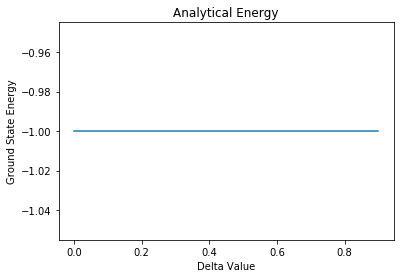

In [34]:
plt.plot(deltas, energies)
plt.xlabel("Delta Value")
plt.ylabel("Ground State Energy")
plt.title("Analytical Energy");

## Plot all parameters as a function of delta

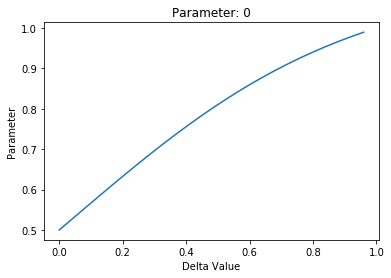

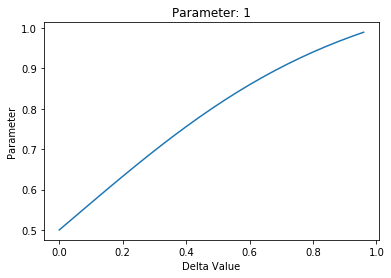

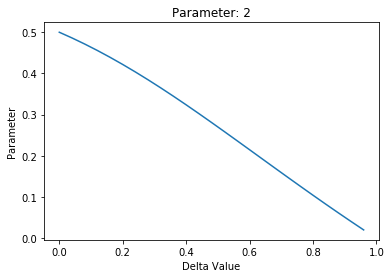

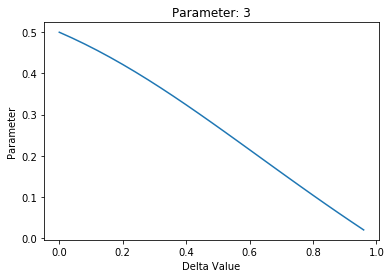

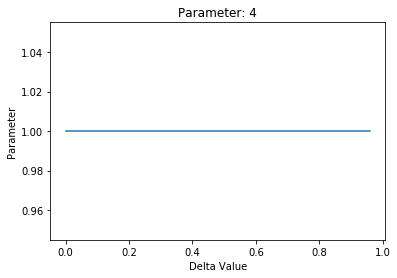

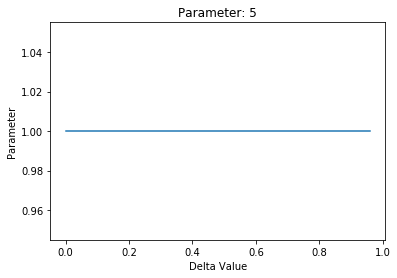

In [20]:
for i, params in enumerate([param0s, param1s, param2s, param3s, param4s,param5s]):
    plt.plot(deltas, params)
    plt.xlabel("Delta Value")
    plt.ylabel("Parameter")
    plt.title(f"Parameter: {i}")
    plt.show()

In [21]:
def get_optimal_energy(delta):
    i = deltas.index(delta)
    return float(energies[i])

In [22]:
float(get_optimal_energy(0.3))

ValueError: 0.3 is not in list

In [23]:
do_print = False
for d in range()
for x in H.eigenvects():
    energy, multiplicity, vec = x
    if do_print:
        print("--"*20)
        print(f"Energy: {energy}")
        print(f"Mult: {multiplicity}")
        print(f"Vector: {vec}")

SyntaxError: invalid syntax (<ipython-input-23-6c40b223a589>, line 2)

# 2 Particle grount States

In [18]:
d = sp.Symbol('delta')
E = sp.Symbol('E') # energy eigen value
quater = sp.Rational(1,4)
neg_half = sp.Rational(1,2)
H = sp.Matrix(
    [[quater, 0, 0 , 0],
     [0, -1*quater, neg_half, 0 ],
     [0, neg_half, -1*quater, 0],
     [0, 0, 0, quater]
              ])
I = sp.eye(6)

In [19]:
H.eigenvects()

[(-3/4, 1, [Matrix([
   [ 0],
   [-1],
   [ 1],
   [ 0]])]), (1/4, 3, [Matrix([
   [1],
   [0],
   [0],
   [0]]), Matrix([
   [0],
   [1],
   [1],
   [0]]), Matrix([
   [0],
   [0],
   [0],
   [1]])])]

## Complex Number Testing

In [20]:
x = complex(10,2)

In [21]:
complex(1,2) == 1 + 2j

True

In [22]:
x

(10+2j)